https://stackoverflow.com/questions/51279141/incorrect-eigenvalue-with-simply-qr-iteration-by-python

In [63]:
import numpy as np
import scipy.linalg as linalg
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [64]:
def qr_iteration(A, iterationNum):
    for i in range(iterationNum):
        Q, R = linalg.qr(A)
        A = np.dot(R, Q)
    return np.diag(A), Q, R, A

In [65]:
# Asymmetric
A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]) 
# Symmetric
A = np.array([[10, -5, 0], 
              [-5, 20, 3], 
              [0, 3, -3]]) 



In [66]:
a, vectors = linalg.eig(A)
c, Q, R, A = qr_iteration(A, 100)
print("linalg eigenvalues a =", a)   # [ 1.61168440e+01+0.j -1.11684397e+00+0.j -1.30367773e-15+0.j]
print("QR iteration eigenvalues c =", c)   # [-1.61168440e+01  1.11684397e+00 -1.33381856e-15]
print("Q =\n", Q)
print("Q tends to a diagonal matrix with +1 or -1 on the diagonal as the number of iterations increases\n")
print("R =\n", R)
print("R is upper-triangular and its diagonal elements approach the  +-eigenvalues of the original matrix as the number of iterations increases\n")
print("A =\n", A)
print("A tends to an upper-triangular matrix with the eigenvalues of the original matrix on the diagonal as the number of iterations increases\n")
print("vectors =\n", vectors)
print("vectors contain the eigenvectors of the original matrix A obtained by np.linalg.eig function")


linalg eigenvalues a = [22.37489961+0.j  8.04265012+0.j -3.41754974+0.j]
QR iteration eigenvalues c = [22.37489961  8.04265012 -3.41754974]
Q =
 [[-1.00000000e+00 -1.62421888e-44 -3.68207703e-82]
 [ 1.62421888e-44 -1.00000000e+00 -2.26698328e-38]
 [-0.00000000e+00 -2.26698328e-38  1.00000000e+00]]
Q tends to a diagonal matrix with +1 or -1 on the diagonal as the number of iterations increases

R =
 [[-2.23748996e+01  1.14266543e-15  2.15758570e-16]
 [ 0.00000000e+00 -8.04265012e+00 -1.69592319e-16]
 [ 0.00000000e+00  0.00000000e+00 -3.41754974e+00]]
R is upper-triangular and its diagonal elements approach the  +-eigenvalues of the original matrix as the number of iterations increases

A =
 [[ 2.23748996e+01 -1.14266543e-15  2.15758570e-16]
 [-1.30630241e-43  8.04265012e+00 -1.69592319e-16]
 [ 0.00000000e+00  7.74752812e-38 -3.41754974e+00]]
A tends to an upper-triangular matrix with the eigenvalues of the original matrix on the diagonal as the number of iterations increases

vectors =


In [67]:
def qr_iteration_plot(A, iterationNum):
    phi = np.linspace(0, 2*np.pi, 30)
    plt.figure(figsize=(10, 5))

    # plot unit circle
    xs = np.array([
    np.cos(phi),
    np.sin(phi)
    ])

    plt.gca().set_aspect("equal")
    plt.title("$APx$")
    plt.plot(xs[0], xs[1])
    plt.grid()

    plt.figure(figsize=(15, 10))

    for i in range(iterationNum):
        Axs = A.dot(xs)
        plt.grid()
        #n_plt = 121+i
        #plt.subplot(n_plt)
        plt.gca().set_aspect("equal")
        plt.title("$APx$")
        plt.plot(Axs[0], Axs[1], linewidth=4, label=f"{i+1} iteration")
        Q, R = linalg.qr(A)
        A = np.dot(R, Q)
    plt.legend()
    return np.diag(A), Q, R, A

(array([ 2.99993226, -0.99993226]), array([[-0.99986453, -0.01645951],
        [-0.01645951,  0.99986453]]), array([[-2.9997968 , -0.03291902],
        [ 0.        , -1.00006774]]), array([[ 2.99993226,  0.01646063],
        [ 0.01646063, -0.99993226]]))

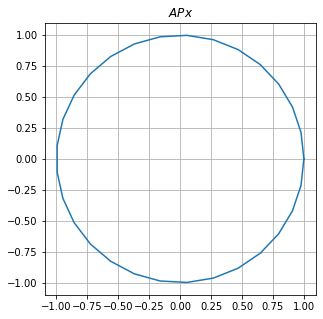

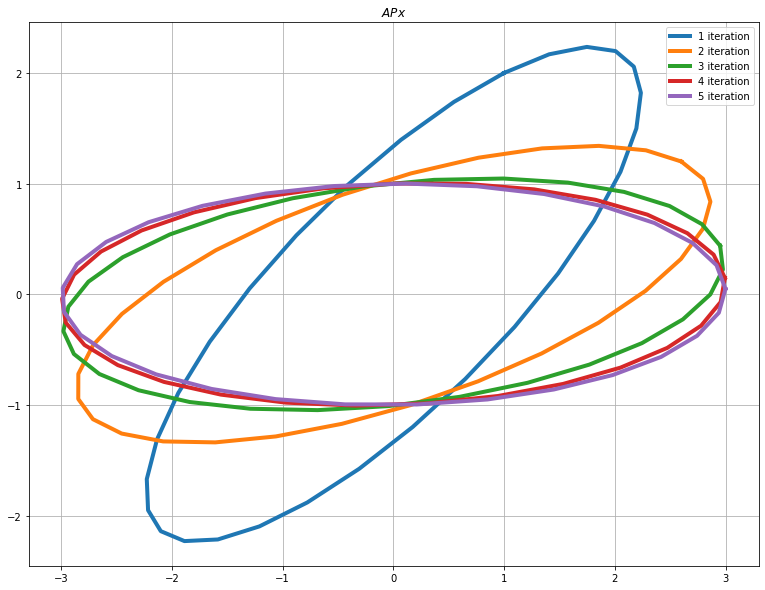

In [68]:
#A = np.array([[1.5, -0.5], [-0.5, 1.5]])
A = np.array([[1, 2], [2, 1]])
qr_iteration_plot(A, 5)

stopped here

In [69]:
np.diag((1, 2, 3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [70]:
a, b = linalg.eig(np.diag((1, 2, 3)))
c, d, r, A = qr_iteration(np.diag((1, 2, 3)), 10)
a

array([1.+0.j, 2.+0.j, 3.+0.j])

In [71]:
c

array([1., 2., 3.])

In [72]:

import matplotlib.pyplot as plt
def plot_polynom(coeficients: np.ndarray):
    # start, stop = poly.polyroots(coeficients[::-1])

    roots = poly.polyroots(coeficients[::-1])
    isreal = np.isreal(roots)
    print("isreal =", isreal)     
    realRoots = roots[isreal].real     
    print("realRoots =", realRoots)   
    print(poly.polyroots(coeficients[::-1]))
    print(roots)    
    start = np.min(realRoots) - 5
    stop = np.max(realRoots) + 10

    # if start>0:start+=2 
    # else: start-=2
    # if stop>0: stop+=2
    # else: stop-=2
    x = np.linspace(start, stop, 1000)
    fig = plt.figure(figsize = (14, 8))
    print(coeficients)
    # y2 = (x**3) - (x**2) - 2*x + 6
    y = 0
    ys = ""
    for it in range(0, len(coeficients)):
        ys += f"$+({(coeficients[it])})" + "*x^" + f"{len(coeficients) - it - 1}$"
        y += (coeficients[it])*x**(len(coeficients) - it - 1)

    plt.plot(x, y, 'r-.', label =f'plynom {ys}')
    # plt.plot(start, 0, marker="|", markersize=20, markeredgecolor="red", markerfacecolor="green")
    # plt.plot(stop, 0, marker="|", markersize=20, markeredgecolor="red", markerfacecolor="green")

    for realRoot in realRoots:
        # draw a point
        print("I am drawing a real root = ", realRoot)
        plt.plot(realRoot, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
    
    plt.axhline(y=0, color='k', linestyle='-')
    plt.axvline(x=0, color='k', linestyle='-')
    plt.xticks(range(int(np.ceil(start)), int(np.ceil(stop))))
    plt.legend()
    plt.grid(True, linestyle =':')
    plt.show()


isreal = [ True False False]
realRoots = [-1.84546609]
[-1.84546609+0.j          1.42273305-1.10771922j  1.42273305+1.10771922j]
[-1.84546609+0.j          1.42273305-1.10771922j  1.42273305+1.10771922j]
[ 1 -1 -2  6]
I am drawing a real root =  -1.8454660914359338


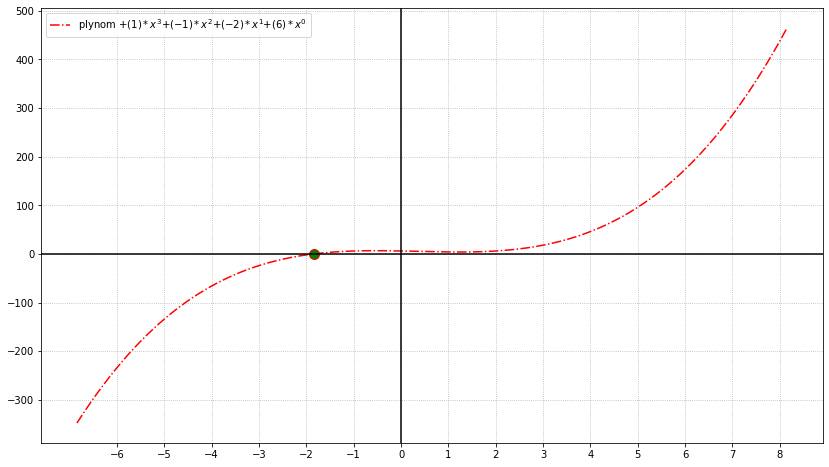

In [73]:
coefs = np.array([1, -1, -2, 6])
plot_polynom(coefs)

In [74]:
import numpy.polynomial.polynomial as poly
poly.polyroots(poly.polyfromroots((-1,0,1)))
poly.polyroots(poly.polyfromroots((-1,0,1))).dtype
j = complex(0,1)
poly.polyroots(poly.polyfromroots((-j,0,j)))

array([0.00000000e+00+0.j, 0.00000000e+00+1.j, 2.77555756e-17-1.j])

In [75]:
quadraticTrinomialCoefs = np.array([1, 2, 1])
poly.polyroots(quadraticTrinomialCoefs)

array([-1., -1.])

In [76]:
quadraticTrinomialCoefs = np.array([-2, 1, 1])
# The order is free term first, and the highest degree last
poly.polyroots(quadraticTrinomialCoefs)

array([-2.,  1.])

In [77]:
reversedCoefs = coefs[::-1]
reversedCoefs

array([ 6, -2, -1,  1])

In [78]:
poly.polyroots(reversedCoefs)

array([-1.84546609+0.j        ,  1.42273305-1.10771922j,
        1.42273305+1.10771922j])

In [79]:
import numpy as np
import scipy.linalg as linalg

def qr_iteration(A):
    for i in range(1000):
        Q, R = linalg.qr(A)
        A = np.dot(R, Q)
    return np.diag(R), Q

A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]) 

a, b = linalg.eig(A)
c, d = qr_iteration(A)
a, c

(array([156.13668406+0.j,  16.05999094+0.j, -34.196675  +0.j]),
 array([156.13668406, -34.196675  ,  16.05999094]))

In [80]:
A = np.array([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]) 
a, b = linalg.eig(A)
c, d = qr_iteration(A)
a, c

(array([156.13668406+0.j,  16.05999094+0.j, -34.196675  +0.j]),
 array([156.13668406, -34.196675  ,  16.05999094]))

In [81]:
A = np.array([[12, -51, -4], 
              [6, 0, -68], 
              [-4, 24, -41]]) 

# Restoring eigenvectors in QR iteration

Slide example

Matrices $Q_i$ are taken form the slides

In [82]:
Q1 = np.array([[-0.555, 0.832], [-0.832, -0.555]])
Q2 = np.array([[-0.972, -0.235], [0.235, -0.972]])
Q3 = np.array([[-0.999, 0.048], [-0.048, -0.999]])
Q = Q1 @ Q2 @ Q3

print('eigenvectors: ', Q)

eigenvectors:  [[-0.70168763  0.71287976]
 [-0.71287976 -0.70168763]]


In [83]:
linalg.eigh(np.array([[2, 3], [3, 2]]))

(array([-1.,  5.]), array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))